In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
%pylab inline
import seaborn as sns
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import fcluster

Populating the interactive namespace from numpy and matplotlib


Load data

In [2]:
os.chdir('../../../Rat-Pilot/atac-data/tag_directories/')

In [ ]:
all_exp = pd.read_csv('merged-all.rlog.txt',sep='\t')
colnames = {all_exp.columns[0]:'PeakID'}
for col in all_exp.columns[19:]:
    colnames[col] = col.split()[0]
all_exp = all_exp.rename(colnames,axis=1)
all_exp = all_exp[['PeakID','Chr','Start','End','Annotation']+list(all_exp.columns[19:])]
all_exp['Annotation'] = all_exp.apply(lambda x: x[4].split()[0].lower(),axis=1)
all_exp.head()

In [3]:
all_exp = pd.read_csv('all_peaks.rlog.txt',sep='\t')
colnames = {all_exp.columns[0]:'PeakID'}
for col in all_exp.columns[19:]:
    colnames[col] = col.split()[0].split('/')[1]
all_exp = all_exp.rename(colnames,axis=1)
all_exp = all_exp[['PeakID','Chr','Start','End','Annotation']+list(all_exp.columns[19:])]
all_exp = all_exp.fillna('')
all_exp['Annotation'] = all_exp.Annotation.str.lower()
all_exp.head()

,PeakID,Chr,Start,End,Annotation,Core-r1,Core-r2,IP-r1,IP-r2,PFC-r1,PFC-r2,PL-r1,PL-r2,Shell-r1,Shell-r2,Striatum-r1,Striatum-r2,VTA-r1,VTA-r2
0,Merged-chrM-14962-4,chrM,14446,15504,,18.708700,18.783639,19.357710,18.883340,19.142593,18.787819,19.351417,19.125902,18.705849,18.409388,19.004568,18.708808,18.770910,18.898648
1,Merged-chr2-110305698-6,chr2,110305365,110306035,promoter-tss (nm_001047948),4.240106,10.605519,4.391971,10.758659,4.610998,10.571106,4.414741,10.979495,4.544273,10.322004,4.115506,10.412638,5.563545,10.365013
2,Merged-chr2-198589905-9,chr2,198589687,198590119,intergenic,10.155034,10.519115,11.183911,10.657254,10.854870,10.461368,11.088579,10.857261,10.269088,10.037761,10.421919,10.157028,10.155795,10.390206
3,Merged-chr4-77448184-14,chr4,77447678,77448738,intergenic,10.364654,10.387226,10.595393,10.569453,10.198092,10.101427,10.251397,10.178567,10.422040,10.352076,10.217335,10.132058,10.171939,10.472982
4,Merged-chr13-33505050-14,chr13,33504525,33505583,intergenic,9.791578,9.594396,10.046375,9.891174,9.676870,9.806551,9.582405,9.541090,10.063865,9.625001,9.399051,9.137302,10.898152,10.311956


In [ ]:
distal_exp = pd.read_csv('merged-distal.rlog.txt',sep='\t')
colnames = {distal_exp.columns[0]:'PeakID'}
for col in distal_exp.columns[19:]:
    colnames[col] = col.split()[0]
distal_exp = distal_exp.rename(colnames,axis=1)
distal_exp = distal_exp[['PeakID','Chr','Start','End','Annotation']+list(distal_exp.columns[19:])]
del distal_exp['Annotation']
distal_exp.head()

In [4]:
distal_exp = pd.read_csv('all_peaks.distal.rlog.txt',sep='\t')
colnames = {distal_exp.columns[0]:'PeakID'}
for col in distal_exp.columns[19:]:
    colnames[col] = col.split()[0].split('/')[1]
distal_exp = distal_exp.rename(colnames,axis=1)
distal_exp = distal_exp[['PeakID','Chr','Start','End','Annotation']+list(distal_exp.columns[19:])]
distal_exp.head()

,PeakID,Chr,Start,End,Annotation,Core-r1,Core-r2,IP-r1,IP-r2,PFC-r1,PFC-r2,PL-r1,PL-r2,Shell-r1,Shell-r2,Striatum-r1,Striatum-r2,VTA-r1,VTA-r2
0,Merged-chr2-198589905-9,chr2,198589687,198590119,Intergenic,10.162337,10.517918,11.153771,10.678155,10.765769,10.435554,11.061045,10.844020,10.237402,10.110829,10.422173,10.161160,10.117088,10.473301
1,Merged-chr4-77448184-14,chr4,77447678,77448738,Intergenic,10.331751,10.379494,10.597919,10.579615,10.151998,10.091416,10.280480,10.209139,10.355921,10.374967,10.217871,10.118787,10.111968,10.529637
2,Merged-chr13-33505050-14,chr13,33504525,33505583,Intergenic,9.765513,9.614132,10.054102,9.917890,9.632409,9.776200,9.627039,9.584468,9.984825,9.668963,9.430331,9.173537,10.730656,10.340115
3,Merged-chr19-56338619-15,chr19,56338111,56339202,Intergenic,10.143852,10.112398,10.486724,10.346913,9.980468,10.106323,10.284485,10.224314,10.207464,10.241525,9.679577,9.639002,10.797638,10.381749
4,Merged-chr1-11911002-10,chr1,11910576,11911430,"intron (NM_001025002, intron 6 of 6).2",9.128995,9.280796,9.130306,9.196383,8.484502,8.590042,8.884085,9.012024,9.093937,8.962666,8.684457,8.939433,8.695265,8.730685


Separate by annotation

In [5]:
promoter = all_exp[all_exp.Annotation.str.contains('promoter-tss')]
del promoter['Annotation']
promoter.head()

,PeakID,Chr,Start,End,Core-r1,Core-r2,IP-r1,IP-r2,PFC-r1,PFC-r2,PL-r1,PL-r2,Shell-r1,Shell-r2,Striatum-r1,Striatum-r2,VTA-r1,VTA-r2
1,Merged-chr2-110305698-6,chr2,110305365,110306035,4.240106,10.605519,4.391971,10.758659,4.610998,10.571106,4.414741,10.979495,4.544273,10.322004,4.115506,10.412638,5.563545,10.365013
9,Merged-chr12-1510456-14,chr12,1509913,1510971,8.763972,8.649604,8.520753,8.674368,8.649611,8.714126,8.535012,8.653433,8.967528,8.871674,8.064145,8.006991,10.196897,9.514019
26,Merged-chr9-10013568-14,chr9,10013068,10014203,8.003872,8.062771,7.911871,7.994441,8.045377,8.062661,8.287629,8.198126,7.742786,8.061493,8.293347,7.974252,7.675406,7.812421
30,Merged-chr9-82514595-14,chr9,82514005,82515101,7.760875,7.856029,7.386281,7.852087,7.323245,7.778263,7.856518,7.870389,7.476950,7.940271,8.157805,8.356451,7.694410,7.859091
32,Merged-chr15-44411437-14,chr15,44410888,44411973,7.429357,7.621931,7.265361,7.669659,7.492903,7.669785,7.688082,7.860125,7.039914,7.871184,7.650655,7.723857,7.321456,7.546456


Perform PCA

In [6]:
pca = PCA(n_components=2)

In [7]:
principal_components = pca.fit_transform(distal_exp[distal_exp.columns[5:]].T)

In [8]:
principal_df = pd.DataFrame(data=principal_components,columns=['PC 1','PC 2'])
principal_df['Sample'] = distal_exp[distal_exp.columns[5:]].T.index
principal_df.head()

,PC 1,PC 2,Sample
0,32.942550,7.745021,Core-r1
1,28.687434,4.122520,Core-r2
2,-26.850585,-11.191076,IP-r1
3,-28.014920,-10.749221,IP-r2
4,-31.677808,-17.101003,PFC-r1


In [9]:
figsize(20,14)

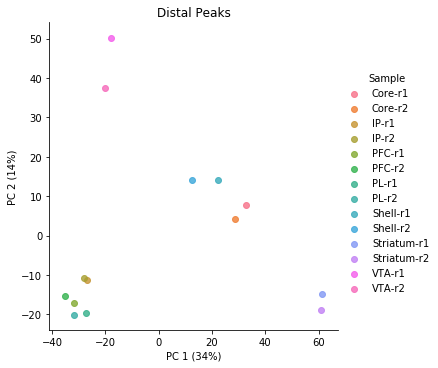

In [10]:
#figsize(10,8)
sns.lmplot(x='PC 1',y='PC 2',data=principal_df,hue='Sample',fit_reg=False)
title('Distal Peaks')
xlabel('PC 1 (34%)')
ylabel('PC 2 (14%)')
savefig('../../../Pipelines/Rat-Pilot-Analysis/Notebooks/PCA.png',kind='png')

In [11]:
pca.explained_variance_ratio_

array([0.34851503, 0.14010395])

In [12]:
principal_components = pca.fit_transform(promoter[promoter.columns[4:]].T)

In [13]:
principal_df = pd.DataFrame(data=principal_components,columns=['PC 1','PC 2'])
principal_df['Sample'] = promoter[promoter.columns[4:]].T.index
principal_df.head()

,PC 1,PC 2,Sample
0,-5.573674,4.648892,Core-r1
1,-4.334133,-2.583565,Core-r2
2,1.778813,-1.725017,IP-r1
3,6.157938,-5.831525,IP-r2
4,4.505808,7.183489,PFC-r1


Text(32.85774305555556, 0.5, 'PC 2 (14%)')

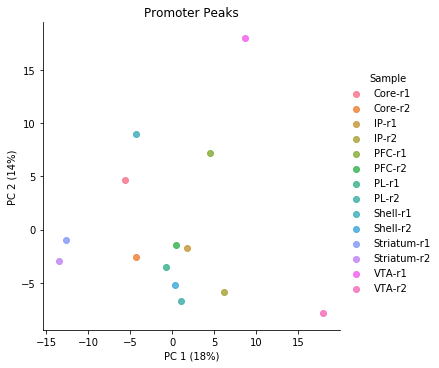

In [14]:
sns.lmplot(x='PC 1',y='PC 2',data=principal_df,hue='Sample',fit_reg=False)
title('Promoter Peaks')
xlabel('PC 1 (18%)')
ylabel('PC 2 (14%)')

In [15]:
pca.explained_variance_ratio_

array([0.18480578, 0.14361148])

Cluster Peaks

In [16]:
distal_exp['var'] = distal_exp[distal_exp.columns[5:]].var(axis=1)

In [17]:
distal_exp = distal_exp.nlargest(int(len(distal_exp)/20),'var')
del distal_exp['var']
distal_exp = distal_exp.set_index('PeakID')

In [18]:
distal_exp.shape

(1428, 18)

<Figure size 720x720 with 0 Axes>

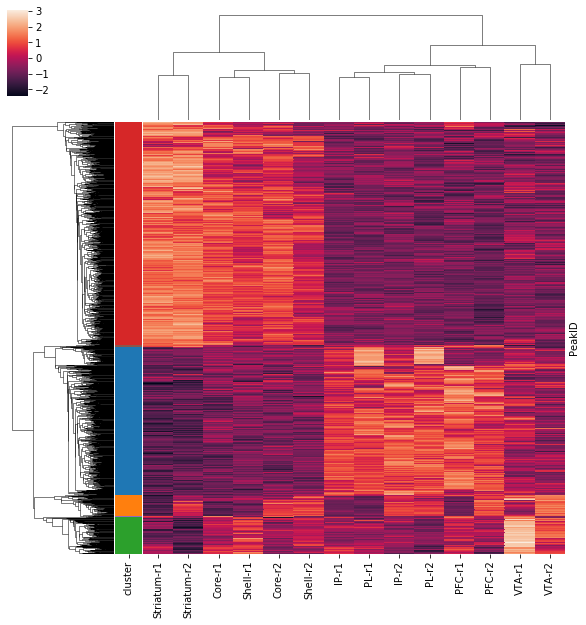

In [19]:
figsize(10,8)
cluster = sns.clustermap(distal_exp[distal_exp.columns[4:]],z_score=0,yticklabels=False)
clf()
distal_exp['cluster'] = fcluster(cluster.dendrogram_row.linkage,4.25,'distance')
pal = sns.color_palette()
lut = dict(zip(distal_exp.cluster.unique(),pal))
row_colors = distal_exp.cluster.map(lut)
sns.clustermap(distal_exp[distal_exp.columns[4:-1]],row_linkage=cluster.dendrogram_row.linkage,
               col_linkage=cluster.dendrogram_col.linkage,row_colors=row_colors,z_score=0,yticklabels=False)
#del distal_exp['cluster']
savefig('Cluster-ATAC.svg',kind='svg')

In [ ]:
sns.palplot(pal)

In [ ]:
distal_exp.groupby('cluster').count()

In [ ]:
distal_exp[distal_exp.cluster == 1]

In [ ]:
df = pd.read_csv('../../tss.coverage.txt',sep='\t')
df = df.rename({df.columns[0]:'Distance from Center'},axis=1)
df = df.set_index('Distance from Center')
keep_cols = []
rename_cols = {}
for col in df.columns:
    if 'Coverage' in col:
        keep_cols.append(col)
        if 'atac' in col:
            rename_cols[col] = 'ATAC'
        else:
            rename_cols[col] = 'H3K27ac'
df = df[keep_cols]
df = df.rename(rename_cols,axis=1)
df.head()

In [ ]:
['b' for x in range(14)]

In [ ]:
figsize(10,8)
df.plot(color = ['b' for x in range(14)]+['r' for x in range(6)])
legend(bbox_to_anchor=(1.0, 1.0))
ylabel('Coverage')
title('Coverage at TSSs')
savefig('../../../Pipelines/Rat-Pilot-Analysis/Notebooks/TSS-coverage.png',kind='png')

In [ ]:
atac_cols = []
for col in df.columns:
    if 'ATAC' in col:
        atac_cols.append(col)
df[atac_cols].plot()
title('Coverage at all TSSs')

In [ ]:
h3k27ac_cols = []
for col in df.columns:
    if 'H3K27ac' in col:
        h3k27ac_cols.append(col)
df[h3k27ac_cols].plot()
title('Coverage at all TSSs')